In [ ]:

import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers.pooling import MaxPool2D
from keras.layers.pooling import GlobalAvgPool2D
from keras import backend as K
from tensorflow.keras import regularizers
tf.__version__
from keras import applications

Using TensorFlow backend.


In [ ]:
!curl -L https://app.roboflow.ai/ds/3fZYcO8lo1?key=qyRmcj1Q3Q > roboflow.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   889  100   889    0     0   1224      0 --:--:-- --:--:-- --:--:--  1224
100  210M  100  210M    0     0  97.7M      0  0:00:02  0:00:02 --:--:--  193M


In [ ]:

from zipfile import ZipFile
file="roboflow.zip"

with ZipFile(file,'r') as zip:
  zip.extractall()

In [ ]:
rm roboflow.zip

In [ ]:
PATH='/content'

train_dir = os.path.join(PATH,'train')
valid_dir = os.path.join(PATH,'valid')

train_healthy_dir = os.path.join(train_dir,'healthy')
train_multiple_diseases_dir = os.path.join(train_dir,'multiple_diseases')
train_rust_dir = os.path.join(train_dir,'rust')
train_scab_dir = os.path.join(train_dir,'scab')

valid_healthy_dir = os.path.join(valid_dir,'healthy')
valid_multiple_diseases_dir = os.path.join(valid_dir,'multiple_diseases')
valid_rust_dir = os.path.join(valid_dir,'rust')
valid_scab_dir = os.path.join(valid_dir,'scab')

num_healthy_train = len(os.listdir(train_healthy_dir))
num_multiple_diseases_train = len(os.listdir(train_multiple_diseases_dir))
num_rust_train = len(os.listdir(train_rust_dir))
num_scab_train = len(os.listdir(train_scab_dir))

num_healthy_valid = len(os.listdir(valid_healthy_dir))
num_multiple_diseases_valid = len(os.listdir(valid_multiple_diseases_dir))
num_rust_valid = len(os.listdir(valid_rust_dir))
num_scab_valid = len(os.listdir(valid_scab_dir))

total_train = num_healthy_train + num_multiple_diseases_train + num_rust_train+num_scab_train
total_val = num_healthy_valid + num_multiple_diseases_valid + num_rust_valid+num_scab_valid

print(total_train)

print(total_val)
print(num_healthy_train)
print(num_scab_train)
print(num_rust_train)
print(num_multiple_diseases_train)

3079
273
853
991
1091
144


In [ ]:
IMG_HEIGHT = 200
IMG_WIDTH = 200
batch_size = 273

image_gen_train = ImageDataGenerator(rescale=1./255)
                    
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')

image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                   directory=valid_dir,
                                                   target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                   class_mode='categorical')


Found 3079 images belonging to 4 classes.
Found 273 images belonging to 4 classes.


In [ ]:
sample_training_images, labels = next(val_data_gen)

NameError: ignored

In [ ]:
def data_analysis_val(model_test):
  sample_training_images, labels = next(val_data_gen)

  arr_list_1_val=[]
  arr_list_2_val=[]
  arr_list_3_val=[]
  arr_list_4_val=[]
  check_1_arr=np.array([1.0,0.0,0.0,0.0])
  check_2_arr=np.array([0.0,1.0,0.0,0.0])
  check_3_arr=np.array([0.0,0.0,1.0,0.0])
  check_4_arr=np.array([0.0,0.0,0.0,1.0])
  for x in range(273):
    arr_1 = check_1_arr==labels[x]
    if arr_1.all()==True:
      arr_list_1_val.append(sample_training_images[x])
    arr_2 = check_2_arr==labels[x]
    if arr_2.all()==True:
      arr_list_2_val.append(sample_training_images[x])
    arr_3 = check_3_arr==labels[x]
    if arr_3.all()==True:
      arr_list_3_val.append(sample_training_images[x])
    arr_4 = check_4_arr==labels[x]
    if arr_4.all()==True:
      arr_list_4_val.append(sample_training_images[x])
    
      

  label_1_arr=check_1_arr*np.ones((len(arr_list_1_val),4))
  label_2_arr=check_2_arr*np.ones((len(arr_list_2_val),4))
  label_3_arr=check_3_arr*np.ones((len(arr_list_3_val),4))
  label_4_arr=check_4_arr*np.ones((len(arr_list_4_val),4))


  model_test.compile(optimizer=keras.optimizers.RMSprop(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  arr_list_1=np.array(arr_list_1_val)
  arr_list_2=np.array(arr_list_2_val)
  arr_list_3=np.array(arr_list_3_val)
  arr_list_4=np.array(arr_list_4_val)


  results_1 = model_test.evaluate(arr_list_1, label_1_arr, batch_size=128)
  results_2 = model_test.evaluate(arr_list_2, label_2_arr, batch_size=128)
  results_3 = model_test.evaluate(arr_list_3, label_3_arr, batch_size=128)
  results_4 = model_test.evaluate(arr_list_4, label_4_arr, batch_size=128)

  result_dict={'class_1':results_1,'class_2':results_2,'class_3':results_3,'class_4':results_4}

  return result_dict



In [ ]:
print(data_analysis_val(model_test))

92/92 [==============================] - 2s 20ms/step
{'class_1': [0.6766065359115601, 0.8636363744735718], 'class_2': [6.704607009887695, 0.3333333432674408], 'class_3': [0.06532077491283417, 0.9866666793823242], 'class_4': [0.17082150280475616, 0.945652186870575]}


In [ ]:
print(len(arr_list_1_val))
print(len(arr_list_2_val))
print(len(arr_list_3_val))
print(len(arr_list_4_val))

88
18
75
92


In [ ]:
label_1_arr=check_1_arr*np.ones((len(arr_list_1_val),4))
label_2_arr=check_2_arr*np.ones((len(arr_list_2_val),4))
label_3_arr=check_3_arr*np.ones((len(arr_list_3_val),4))
label_4_arr=check_4_arr*np.ones((len(arr_list_4_val),4))


In [ ]:
from keras.models import load_model
model_test=load_model('model_5.h5')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [ ]:

model_test.compile(optimizer=keras.optimizers.RMSprop(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
arr_list_1=np.array(arr_list_1_val)
arr_list_2=np.array(arr_list_2_val)
arr_list_3=np.array(arr_list_3_val)
arr_list_4=np.array(arr_list_4_val)


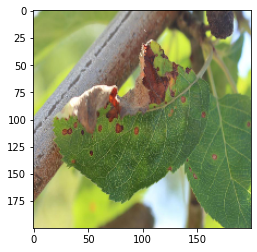

In [ ]:
plt.imshow(arr_list_2[12])

In [ ]:

results_1 = model_test.evaluate(arr_list_1, label_1_arr, batch_size=128)
results_2 = model_test.evaluate(arr_list_2, label_2_arr, batch_size=128)
results_3 = model_test.evaluate(arr_list_3, label_3_arr, batch_size=128)
results_4 = model_test.evaluate(arr_list_4, label_4_arr, batch_size=128)



92/92 [==============================] - 0s 2ms/step


In [ ]:
#classwise accuracy
print(results_1)
print(results_2)
print(results_3)
print(results_4)

[0.6766071915626526, 0.8636363744735718]
[6.70460844039917, 0.3333333432674408]
[0.06532081961631775, 0.9866666793823242]
[0.1708212047815323, 0.945652186870575]


In [ ]:
#overall accuracy of the model
results=model_test.evaluate_generator(val_data_gen)
print(results)

[0.7356738448143005, 0.8901098966598511]


In [ ]:
arr_list_1_train=[]
arr_list_2_train=[]
arr_list_3_train=[]
arr_list_4_train=[]

check_1_arr=np.array([1.0,0.0,0.0,0.0])
check_2_arr=np.array([0.0,1.0,0.0,0.0])
check_3_arr=np.array([0.0,0.0,1.0,0.0])
check_4_arr=np.array([0.0,0.0,0.0,1.0])

In [ ]:
 def data_analysis_train(model_test): 
  arr_list_1_train=[]
  arr_list_2_train=[]
  arr_list_3_train=[]
  arr_list_4_train=[]

  check_1_arr=np.array([1.0,0.0,0.0,0.0])
  check_2_arr=np.array([0.0,1.0,0.0,0.0])
  check_3_arr=np.array([0.0,0.0,1.0,0.0])
  check_4_arr=np.array([0.0,0.0,0.0,1.0])

  for i in range(3079//273-1):
    sample_training_images, labels = next(train_data_gen)
    for x in range(273):
      arr_1 = check_1_arr==labels[x]
      if arr_1.all()==True:
        arr_list_1_train.append(sample_training_images[x])
      arr_2 = check_2_arr==labels[x]
      if arr_2.all()==True:
        arr_list_2_train.append(sample_training_images[x])
      arr_3 = check_3_arr==labels[x]
      if arr_3.all()==True:
        arr_list_3_train.append(sample_training_images[x])
      arr_4 = check_4_arr==labels[x]
      if arr_4.all()==True:
        arr_list_4_train.append(sample_training_images[x])
      
      
  arr_list_1_t=np.array(arr_list_1_train)
  arr_list_2_t=np.array(arr_list_2_train)
  arr_list_3_t=np.array(arr_list_3_train)
  arr_list_4_t=np.array(arr_list_4_train)

  label_1_arr=check_1_arr*np.ones((len(arr_list_1_train),4))
  label_2_arr=check_2_arr*np.ones((len(arr_list_2_train),4))
  label_3_arr=check_3_arr*np.ones((len(arr_list_3_train),4))
  label_4_arr=check_4_arr*np.ones((len(arr_list_4_train),4))


  results_1_t = model_test.evaluate(arr_list_1_t, label_1_arr, batch_size=128)
  results_2_t = model_test.evaluate(arr_list_2_t, label_2_arr, batch_size=128)
  results_3_t = model_test.evaluate(arr_list_3_t, label_3_arr, batch_size=128)
  results_4_t = model_test.evaluate(arr_list_4_t, label_4_arr, batch_size=128)

  result_dict={'class_1':results_1_t,'class_2':results_2_t,'class_3':results_3_t,'class_4':results_4_t}

  return result_dict



In [ ]:
print(data_analysis_train(model_test))

869/869 [==============================] - 17s 20ms/step
{'class_1': [0.004758289037272334, 0.9973683953285217], 'class_2': [0.052968464959832956, 0.969924807548523], 'class_3': [0.0004730789909189305, 1.0], 'class_4': [4.9293009856390535e-05, 1.0]}


In [ ]:
arr_list_1_t=np.array(arr_list_1_train)
arr_list_2_t=np.array(arr_list_2_train)
arr_list_3_t=np.array(arr_list_3_train)
arr_list_4_t=np.array(arr_list_4_train)

label_1_arr=check_1_arr*np.ones((len(arr_list_1_train),4))
label_2_arr=check_2_arr*np.ones((len(arr_list_2_train),4))
label_3_arr=check_3_arr*np.ones((len(arr_list_3_train),4))
label_4_arr=check_4_arr*np.ones((len(arr_list_4_train),4))


In [ ]:

results_1_t = model_test.evaluate(arr_list_1_t, label_1_arr, batch_size=128)
results_2_t = model_test.evaluate(arr_list_2_t, label_2_arr, batch_size=128)
results_3_t = model_test.evaluate(arr_list_3_t, label_3_arr, batch_size=128)
results_4_t = model_test.evaluate(arr_list_4_t, label_4_arr, batch_size=128)



868/868 [==============================] - 17s 20ms/step


In [ ]:
#classwise accuracy
print(results_1_t)
print(results_2_t)
print(results_3_t)
print(results_4_t)

[0.0034590652747171742, 0.998664915561676]
[0.04845658848288038, 0.9701492786407471]
[0.00045264941561180887, 1.0]
[0.00011009398946664103, 1.0]


So we have the data of the val and train class wise accuracy. Hence we can see which class in particualr is overfitting the data